
# Comparison of F-test and mutual information

This example illustrates the differences between univariate F-test statistics
and mutual information.

We consider 3 features x_1, x_2, x_3 distributed uniformly over [0, 1], the
target depends on them as follows:

$\ y = x_1 + sin(6 * pi * x_2) + 0.1 * N(0, 1)$ , that is the third feature is
completely irrelevant.

The code below plots the dependency of y against individual x_i and normalized
values of univariate F-tests statistics and mutual information.

As F-test captures only linear dependency, it rates x_1 as the most
discriminative feature. On the other hand, mutual information can capture any
kind of dependency between variables and it rates x_2 as the most
discriminative feature, which probably agrees better with our intuitive
perception for this example. Both methods correctly mark x_3 as irrelevant.


### F-Test in Regression Analysis

The F-test in regression is used to determine whether there is a significant relationship between the dependent variable $ y $ and the set of independent variables $ \mathbf{W} $.

#### Model Formulation

Given a regression model:
$ y = \mathbf{W} \beta + \epsilon $
where:
- $ y $ is the dependent variable (target).
- $ \mathbf{W} $ is the matrix of independent variables (features).
- $ \beta $ is the vector of coefficients.
- $ \epsilon $ is the error term.

#### Hypotheses

- Null hypothesis ($ H_0 $): All regression coefficients are equal to zero (i.e., $ \beta_1 = \beta_2 = \cdots = \beta_k = 0 $).
- Alternative hypothesis ($ H_1 $): At least one regression coefficient is not equal to zero.

#### Sum of Squares

- **Total Sum of Squares (SST)**: Measures the total variation in the dependent variable $ y $.
  $ SST = \sum_{i=1}^{n} (y_i - \bar{y})^2 $
  where $ \bar{y} $ is the mean of $ y $.

- **Regression Sum of Squares (SSR)**: Measures the variation explained by the regression model.
  $ SSR = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2 $
  where $ \hat{y}_i $ is the predicted value of $ y $.

- **Error Sum of Squares (SSE)**: Measures the variation not explained by the regression model (residuals).
  $ SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

#### Mean Squares

- **Mean Regression Sum of Squares (MSR)**:
  $ MSR = \frac{SSR}{k} $
  where $ k $ is the number of independent variables.

- **Mean Error Sum of Squares (MSE)**:
  $ MSE = \frac{SSE}{n - k - 1} $
  where $ n $ is the number of observations.

#### F-Statistic

The F-statistic is calculated as:
$ F = \frac{MSR}{MSE} = \frac{SSR / k}{SSE / (n - k - 1)} $

#### Interpretation

- A high F-statistic value indicates that the model explains a significant portion of the variance in the dependent variable $ y $, leading to the rejection of the null hypothesis.
- The p-value associated with the F-statistic is used to determine the significance level. A p-value less than the chosen significance level (e.g., 0.05) indicates that at least one of the regression coefficients is significantly different from zero.

### Summary

The F-test in regression evaluates whether the explanatory power of the model is significant by comparing the variance explained by the model to the unexplained variance. This test helps in determining the overall significan


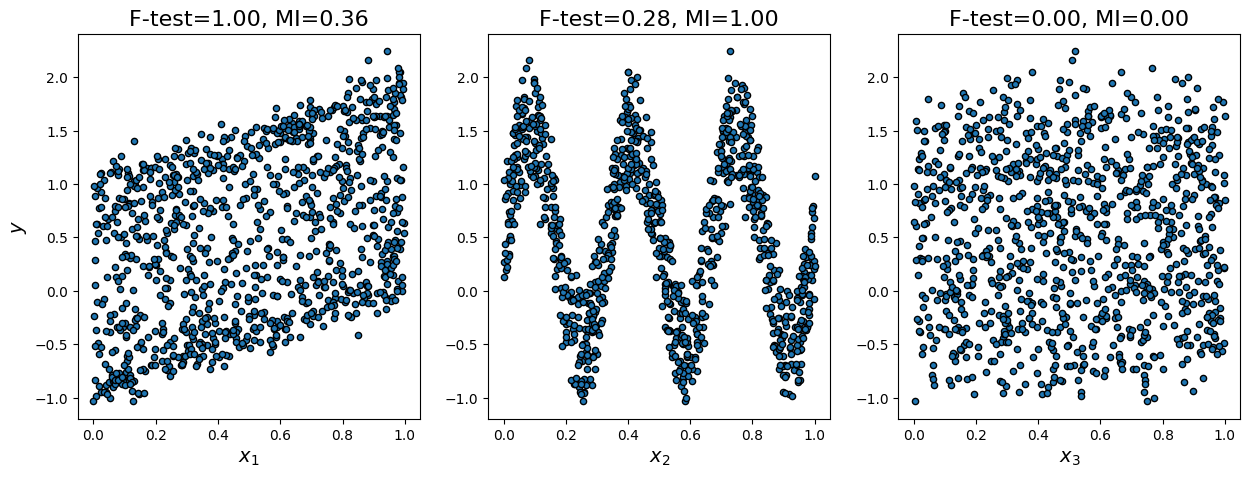

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()